In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bank_df.shape

(5000, 14)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
bank_df=bank_df.drop(['ZIP Code','ID'],axis=1)
bank_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [40]:
bank_df.groupby(['Personal Loan']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


In [63]:
# The given datast has 14 columns and 5000 datapoints per each attribute
# All the columnns are numerical datatypes
# Of these 'ID' & "ZIP CODE" are not useful for modelling
# The attribute "PERSONAL LOAN" is the target column
# There are no null values in the whole dataset
# Most entries have no personal loan taken. The ratio is almost 10:1 in favour of class 0
# The model's ability to predict class 0 will be better than predicting class 1. 

In [29]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


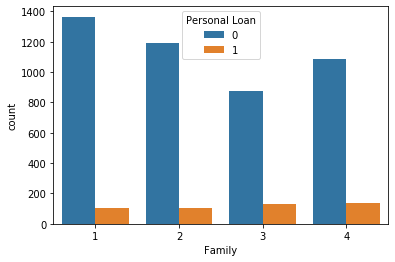

In [58]:
sns.countplot('Family',data=bank_df,hue='Personal Loan')

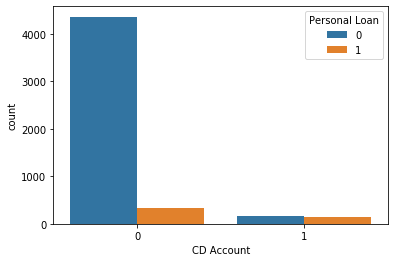

In [62]:
sns.countplot('CD Account',data=bank_df,hue='Personal Loan')

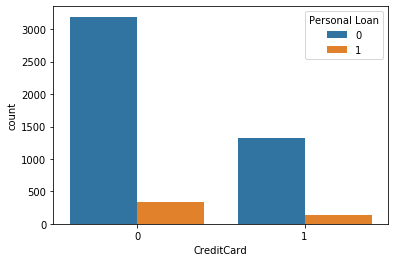

In [50]:
sns.countplot('CreditCard',data=bank_df,hue='Personal Loan')

In [ ]:
# With increasing family members, "personal loan" takers are also slightly increased.
# Almost all people who have taken CD account have opted for "Personal Loan".
# The credit card holders who opted for "personal loan" are very few.

In [11]:
correlation=bank_df.corr()
correlation

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


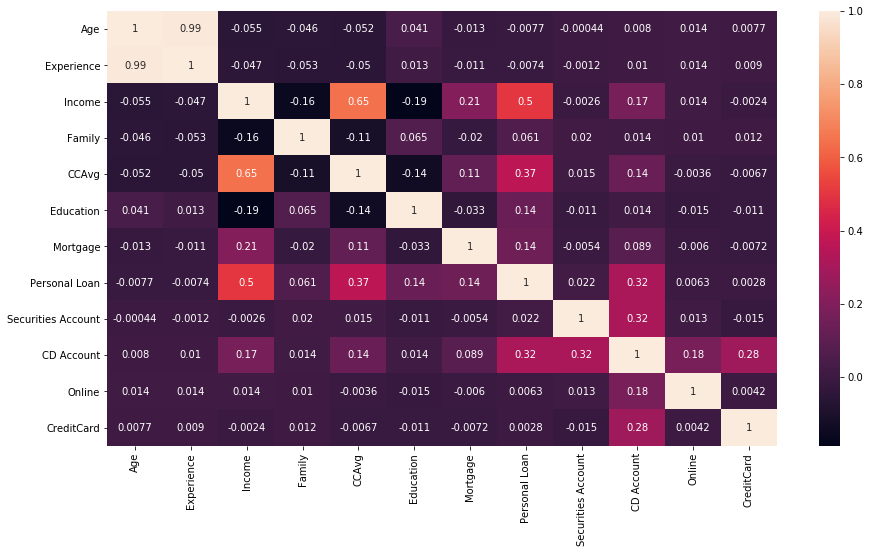

In [24]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(correlation,annot=True)

In [66]:
# Correlation of various attributes with target variable is very low
# Maximum correlation is 0.502462 with "Income"
# "Age" & "Experience" show high correlation which is obvious

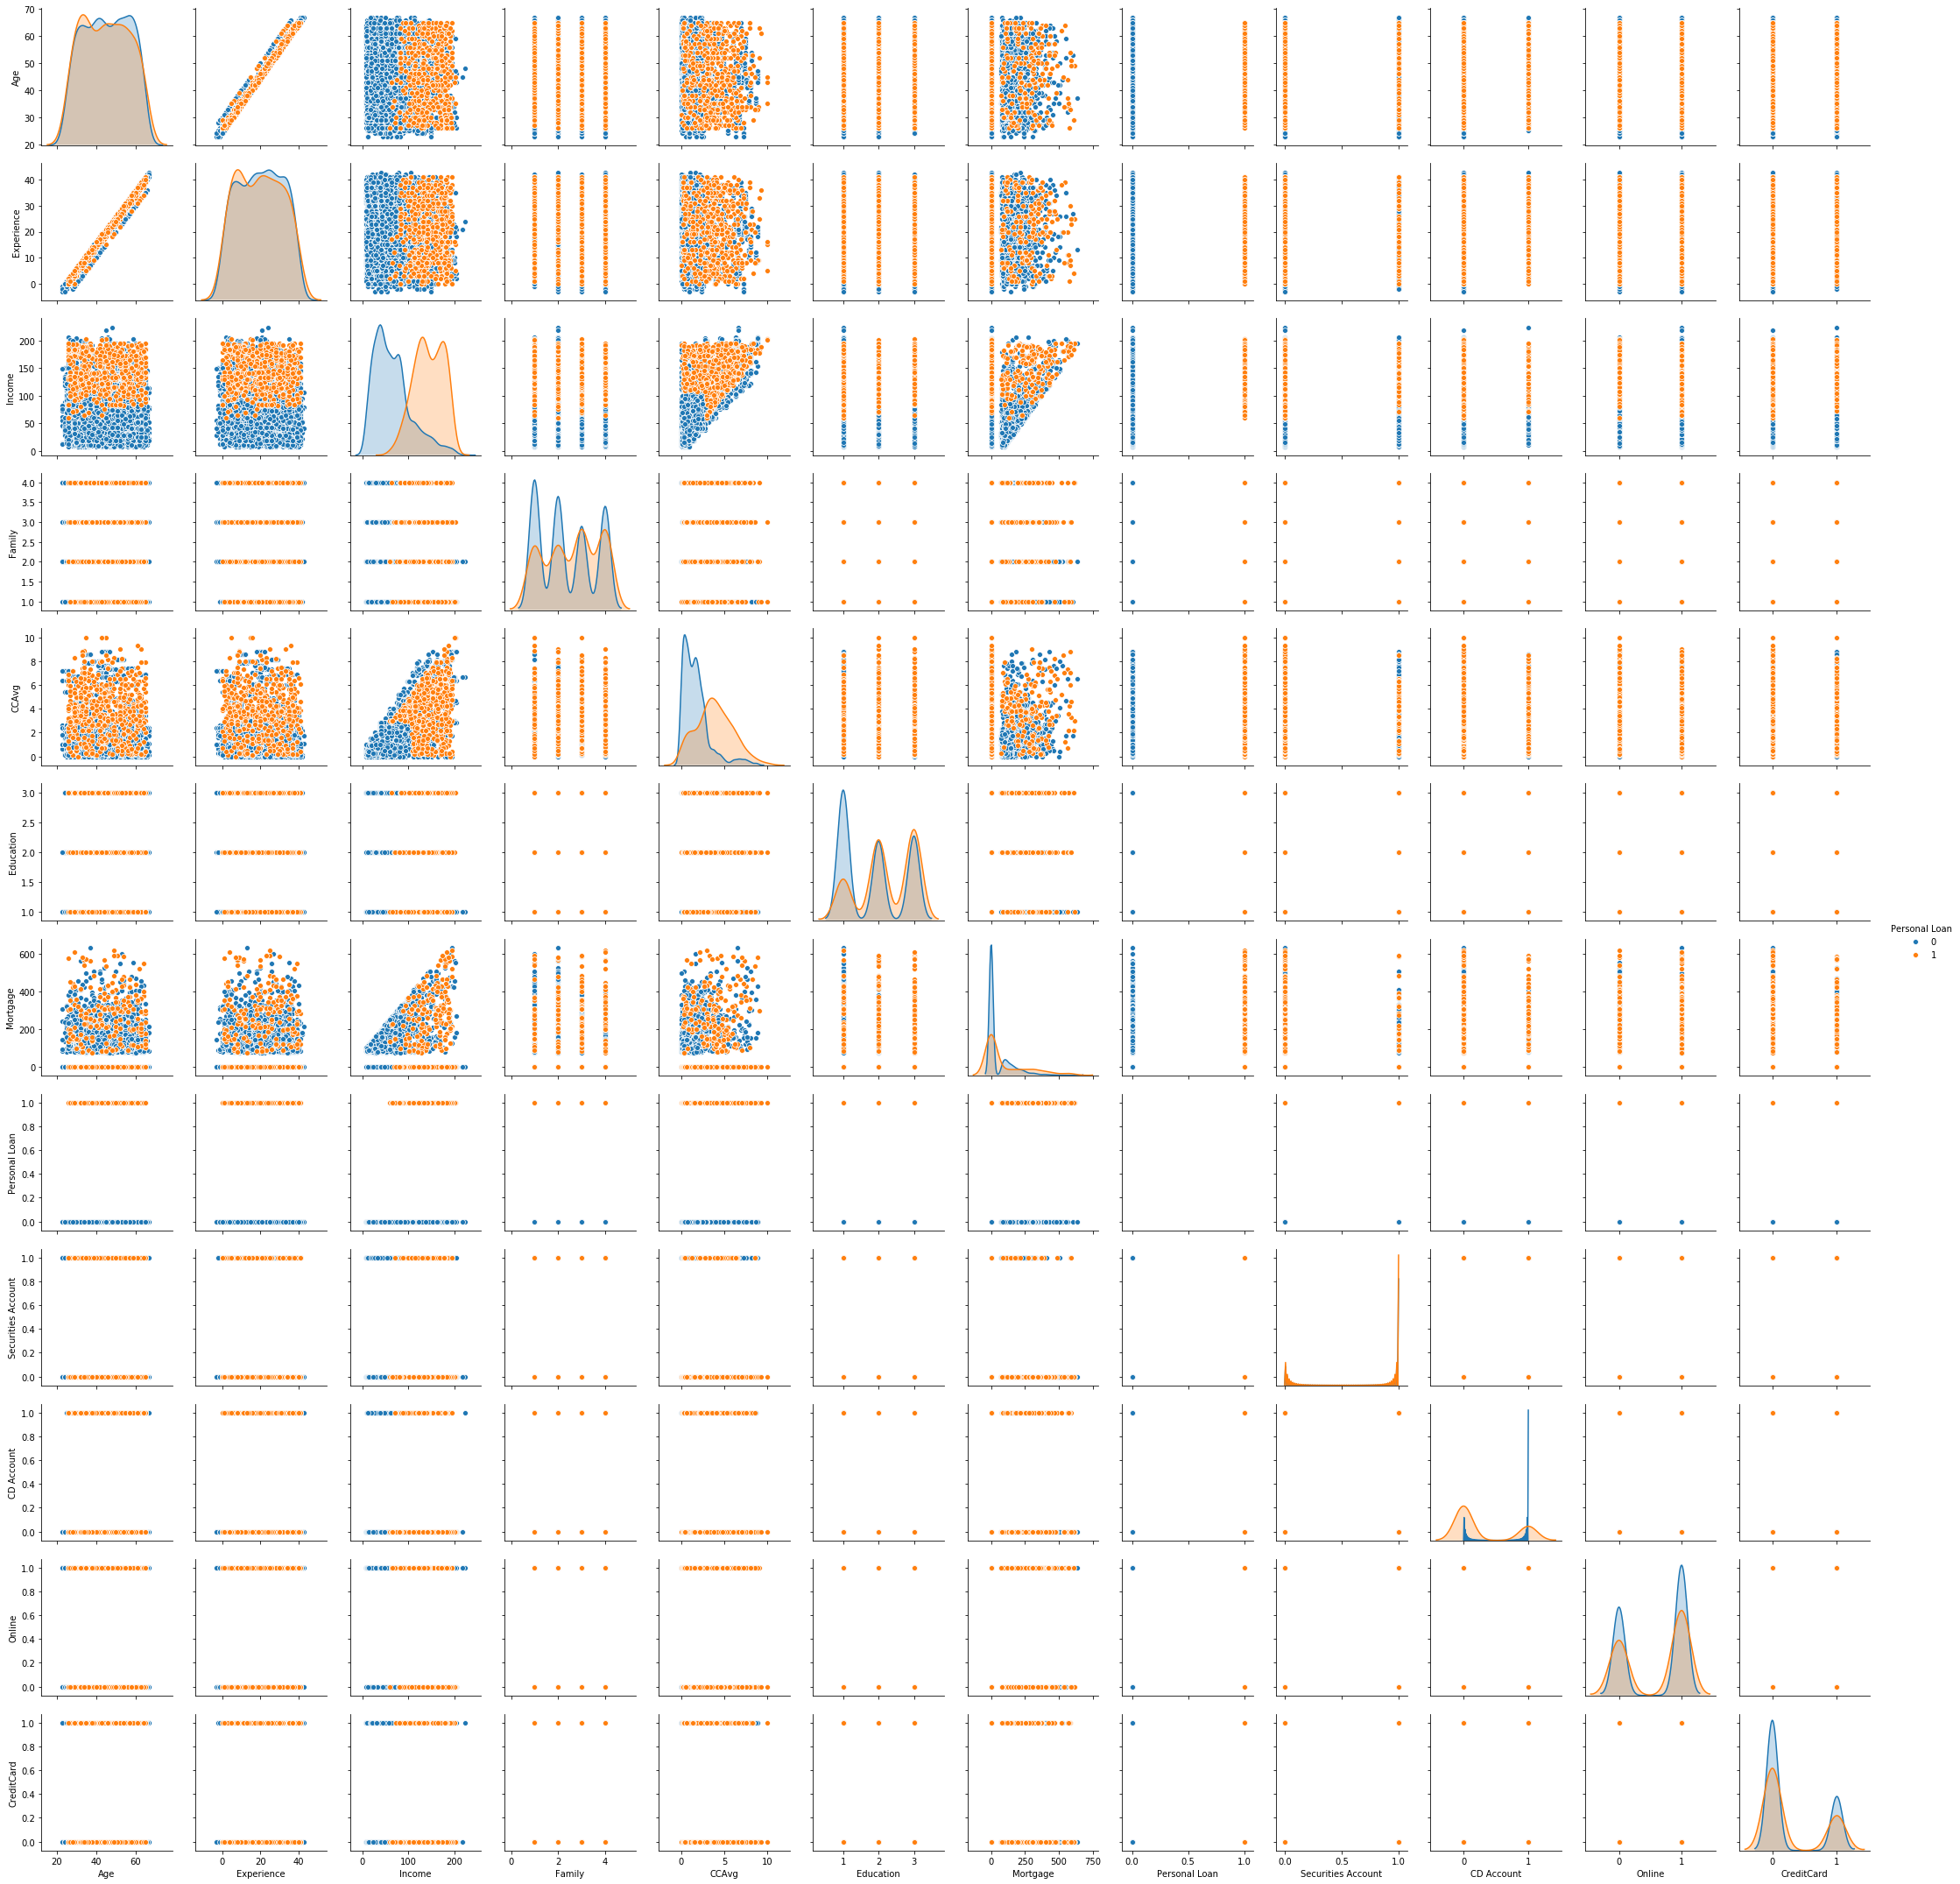

In [35]:
sns.pairplot(bank_df,hue='Personal Loan')

In [126]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import auc, roc_curve

In [127]:
X=bank_df.drop('Personal Loan',axis=1)
X = X.apply(zscore)
y=bank_df['Personal Loan']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## K-NN classification

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
NNH = KNeighborsClassifier()
NNH.fit(X_train, y_train)
print(("Train accuracy: ", NNH.score(X_train, y_train)))
print(("Test accuracy: ", NNH.score(X_test, y_test)))

('Train accuracy: ', 0.9711428571428572)
('Test accuracy: ', 0.9526666666666667)


In [131]:
NNH.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
# Test Confusion matrix
metrics.confusion_matrix(y_test, NNH.predict(X_test))

array([[1344,    7],
       [  64,   85]], dtype=int64)

## Logistic Regression Model

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
print(("Train accuracy: ", LR_model.score(X_train, y_train)))
print(("Test accuracy: ", LR_model.score(X_test, y_test)))

('Train accuracy: ', 0.9531428571428572)
('Test accuracy: ', 0.948)


In [136]:
y_predictProb = LR_model.predict_proba(X_test)
y_predictProb

array([[9.76840864e-01, 2.31591362e-02],
       [9.99684920e-01, 3.15079672e-04],
       [9.99399435e-01, 6.00564523e-04],
       ...,
       [9.95602927e-01, 4.39707333e-03],
       [9.95736455e-01, 4.26354463e-03],
       [9.99298090e-01, 7.01910291e-04]])

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9533380692402843

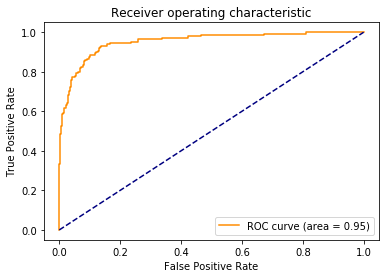

In [138]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [139]:
# Test Confusion matrix
metrics.confusion_matrix(y_test, LR_model.predict(X_test))

array([[1335,   16],
       [  62,   87]], dtype=int64)

## Naive-Bayes' Classification model

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [142]:
print(("Train accuracy: ", NB_model.score(X_train, y_train)))
print(("Test accuracy: ", NB_model.score(X_test, y_test)))

('Train accuracy: ', 0.89)
('Test accuracy: ', 0.8746666666666667)


In [143]:
Y_predictProb = NB_model.predict_proba(X_test)

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9151759323195843

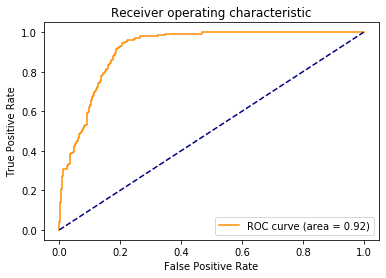

In [145]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [146]:
# Test Confusion matrix
metrics.confusion_matrix(y_test, NB_model.predict(X_test))

array([[1228,  123],
       [  65,   84]], dtype=int64)

In [107]:
# Among the 3 models naive bayes gave lower accuracy compared to K-NN & Logistic regression
# K-NN has shown great accuracy but the prediction probability cannot be obtained
# Among Naive_Bayes and logistic_regression, the "roc_auc" value of logistic_regression model is higher
# Thus we can say Logistic_regression model is the best classifier model for the given dataset